In [2]:
# import packages
import imoco_py.sigpy_e.cfl as cfl
import numpy as np
import sigpy.plot as pl

In [3]:
file_dir = '/data/larson4/UTE_Lung/2021-04-12_ped_patient/cfl/P09728_backup/MRI_Raw'

In [3]:
datam = cfl.read_cfl(file_dir + '_datam')
datam = datam[:,:,:,:,:300,:]
cfl.write_cfl(file_dir + '_datam', datam)

dcf2m = cfl.read_cfl(file_dir + '_dcf2m')
dcf2m = dcf2m[:,:,:,:,:300,:]
cfl.write_cfl(file_dir + '_dcf2m', dcf2m)

trajm = cfl.read_cfl(file_dir + '_trajm')
trajm = trajm[:,:,:,:,:300,:]
cfl.write_cfl(file_dir + '_trajm', trajm)

In [4]:
np.shape(datam)

(6, 1, 10, 13186, 300, 1)

In [4]:
# xd-grasp recon
!python imoco_py/recon_xdgrasp.py {file_dir} --device 0

Traceback (most recent call last):
  File "imoco_py/recon_xdgrasp.py", line 73, in <module>
    mps = ext.jsens_calib(ksp,coord,dcf2,device = sp.Device(0),ishape = tshape)
  File "/working/larson2/ftan/anaconda3/lib/python3.6/site-packages/sigpy/backend.py", line 63, in __init__
    'cupy not installed, but set device {}.'.format(id))
ValueError: cupy not installed, but set device 0.


In [5]:
# imoco recon with motion field derivation
!python imoco_py/recon_imoco.py {file_dir} --reg_flag 1 --device 0

Calibration...
Traceback (most recent call last):
  File "imoco_py/recon_imoco.py", line 87, in <module>
    mps = ext.jsens_calib(ksp,coord,dcf2,device = sp.Device(device),ishape = tshape)
  File "/working/larson2/ftan/anaconda3/lib/python3.6/site-packages/sigpy/backend.py", line 63, in __init__
    'cupy not installed, but set device {}.'.format(id))
ValueError: cupy not installed, but set device 0.


In [ ]:
# plot motion-resolved mrL image
mrL = cfl.read_cfl(file_dir + '_mrL')
pl.ImagePlot(mrL, x = -3, y = -1)

<IPython.core.display.Javascript object>


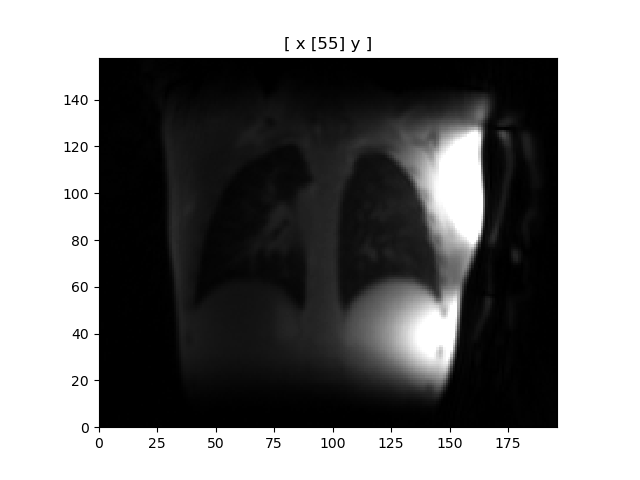

In [8]:
# plot iMoCo image
imoco = cfl.read_cfl(file_dir + '_imoco')
pl.ImagePlot(imoco, x = -3, y = -1)

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [9]:
print(np.amax(np.abs(imoco)))

4.2359966e-07
